# Laptop Price Predictor

In [430]:
# importing libraries 
import pandas as pd
import numpy as np

In [431]:
df = pd.read_csv("laptop_data.csv")

In [432]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [433]:
df.shape

(1303, 12)

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [435]:
df.duplicated().sum()

0

In [436]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [437]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [438]:
df['Ram'] = df['Ram'].str.replace("GB","")
df['Weight']=df['Weight'].str.replace("kg","")

In [439]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [440]:
df['Weight']=df['Weight'].astype('float32')
df['Ram']=df['Ram'].astype('int32')

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [442]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [443]:
import seaborn as sns
import matplotlib as plt

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

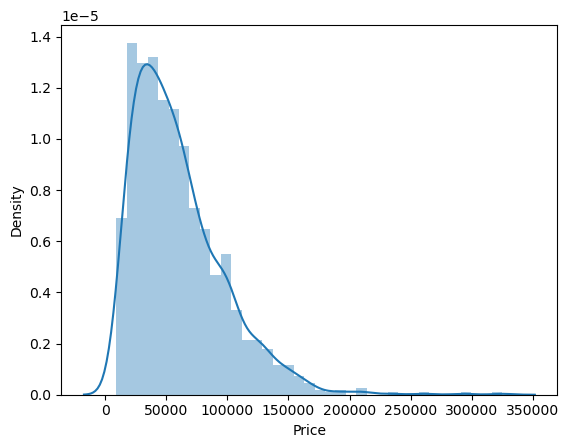

In [444]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

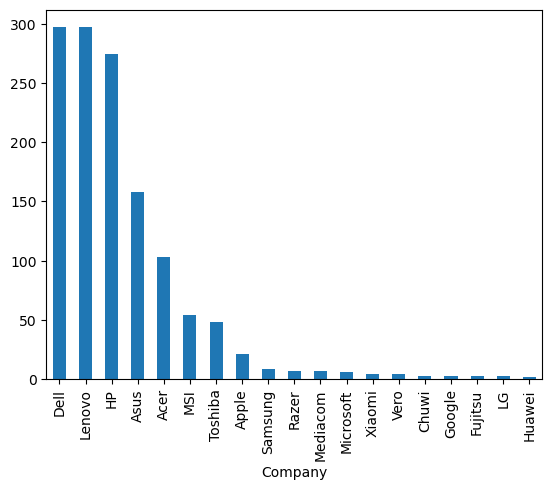

In [445]:
df['Company'].value_counts().plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'xticks'

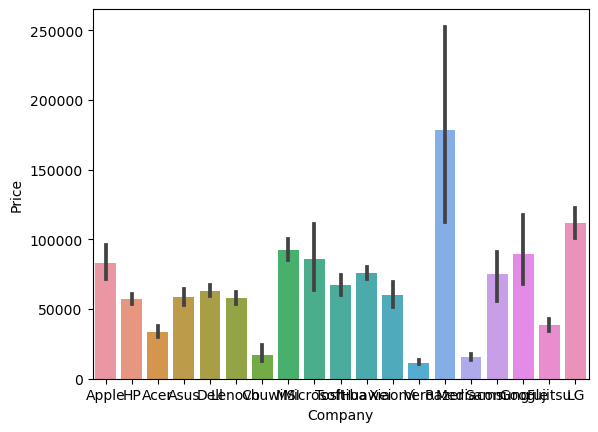

In [446]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
sns.scatterplot(x=df['TypeName'],y=df['Price'])

In [ ]:
df['ScreenResolution'].value_counts()

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [447]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
916,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,51148.80
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72
802,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,79866.72
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,71874.72
729,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon 520,Windows 10,2.10,26053.92


In [448]:
df['Touchscreen'].value_counts().plot(kind='bar',color="y")

KeyError: 'Touchscreen'

In [449]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

KeyError: 'Touchscreen'

In [450]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [451]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1


<Axes: xlabel='IPS'>

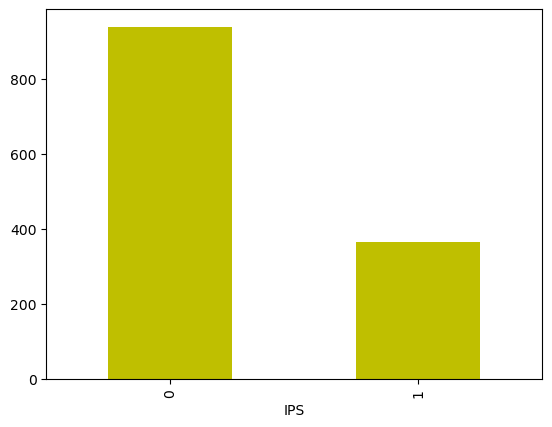

In [452]:
df['IPS'].value_counts().plot(kind='bar',color="y")

<Axes: xlabel='IPS', ylabel='Price'>

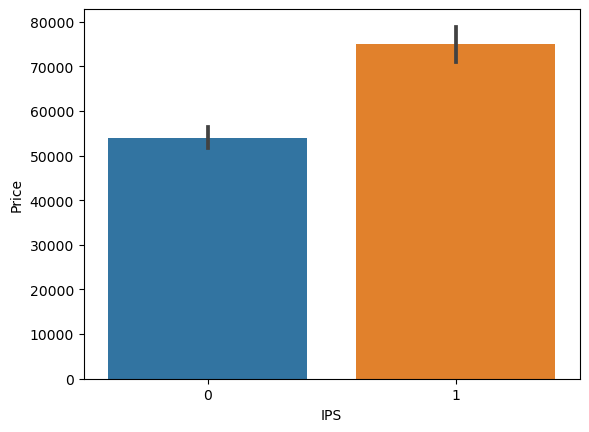

In [453]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [454]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [455]:
df['X_resolution']=new[0]
df['Y_resolution']=new[1]

In [456]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,IPS Panel Retina Display 2560,1600


In [457]:
df['X_resolution'] = df['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [458]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,X_resolution,Y_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,2560,1600


In [459]:
df['X_resolution'] =df['X_resolution'].astype('int32')
df['Y_resolution'] =df['Y_resolution'].astype('int32')

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  IPS               1303 non-null   int64  
 12  X_resolution      1303 non-null   int32  
 13  Y_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(1), object(7)
memory usage: 122.3+ KB


In [461]:
df['ppi'] = (((df['X_resolution']**2) + (df['Y_resolution']**2))**0.5/df['Inches']).astype('float')

In [462]:
df.drop(columns=['ScreenResolution','X_resolution','Y_resolution','Inches'],inplace=True)

In [463]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005


In [464]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [465]:
df['Cpu Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [466]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005,Intel Core i5


In [467]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [468]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [469]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

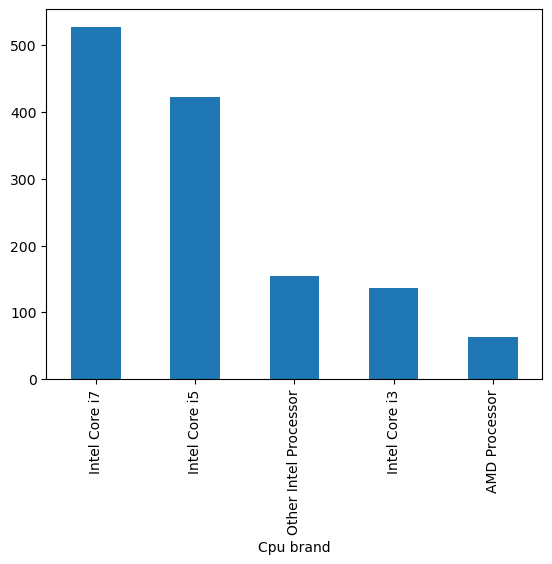

In [470]:
df['Cpu brand'].value_counts().plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'xticks'

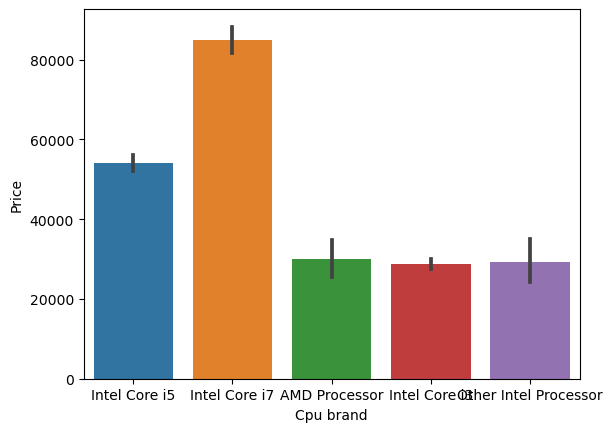

In [471]:
sns.barplot(x='Cpu brand', y='Price', data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.xlabel('Cpu brand')  # Set the x-axis label
plt.show()

In [ ]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [472]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Ram'>

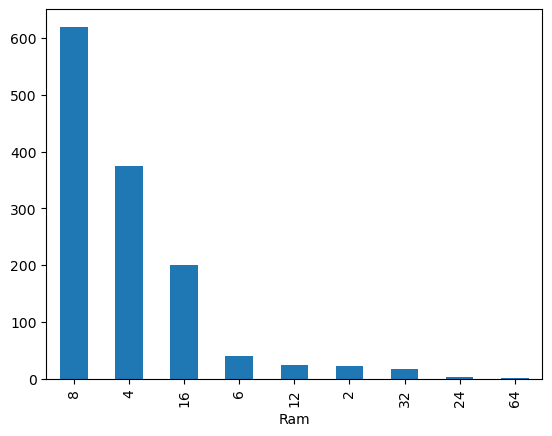

In [473]:
df['Ram'].value_counts().plot(kind='bar')

AttributeError: module 'matplotlib' has no attribute 'xticks'

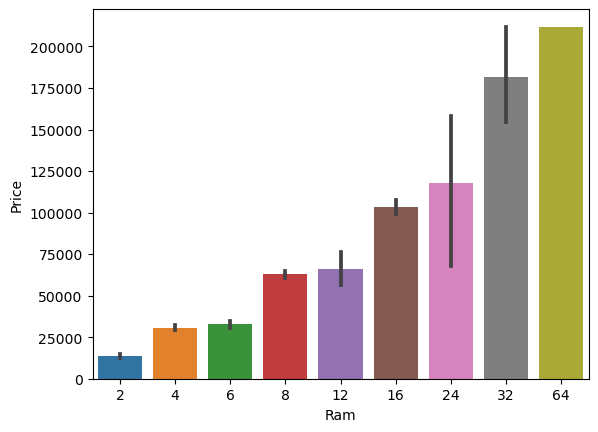

In [474]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [475]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [476]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

In [477]:
df["Memory"] = df["Memory"].str.replace('GB', '')

In [478]:
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [479]:
new = df["Memory"].str.split("+", n = 1, expand = True)

In [480]:
df["first"]= new[0]

In [481]:
df["first"]=df["first"].str.strip()

In [482]:
df["second"]= new[1]

In [483]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)

In [ ]:
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)

In [484]:
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [485]:
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [486]:
df['first'] = df['first'].str.replace(r'\D', '')

In [487]:
df["second"].fillna("0", inplace = True)

In [488]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [489]:
df['second'] = df['second'].str.replace(r'\D', '')

In [493]:
df['first'] = df['first'].str.extract(r'(\d+)').astype('int64')
df['second'] = df['second'].str.extract(r'(\d+)').astype('int64')

In [498]:
df['Layer1SSD'] = (df['first'] > 0).astype(int)  # Create 'Layer1SSD' based on condition on 'first' column
df['Layer2SSD'] = (df['second'] > 0).astype(int)  # Create 'Layer2SSD' based on condition on 'second' column


In [499]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])

In [500]:
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])

In [501]:
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [502]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [503]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5,0,128,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [504]:
df.drop(columns=['Memory'],inplace=True)

In [505]:
df.corr()['Price']

ValueError: could not convert string to float: 'Apple'

In [506]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [507]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD
435,Asus,Gaming,AMD Ryzen 1600 3.2GHz,8,AMD Radeon RX 580,Windows 10,3.20,90309.6000,0,127.335675,AMD Ryzen 1600,AMD Processor,1000,1256
1228,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,16,Nvidia GeForce GTX 960M,Windows 10,2.60,54825.1200,1,141.211998,Intel Core i7,Intel Core i7,1000,1128
793,Lenovo,2 in 1 Convertible,Intel Core i5 7200U 2.5GHz,8,AMD Radeon R7 M460,Windows 10,2.08,51095.5200,0,141.211998,Intel Core i5,Intel Core i5,0,256
1006,HP,Notebook,Intel Core i5 7200U 2.5GHz,4,Intel HD Graphics 620,Windows 10,1.95,64202.4000,0,157.350512,Intel Core i5,Intel Core i5,0,256
1178,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0,141.211998,Intel Core i7,Intel Core i7,1000,1128


In [510]:
df['Gpu Brand']=df['Gpu'].apply(lambda x: x.split()[0])

In [512]:
df['Gpu Brand'].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [513]:
df = df[df['Gpu Brand'] != 'ARM']

In [514]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel


<Axes: xlabel='Gpu Brand', ylabel='Price'>

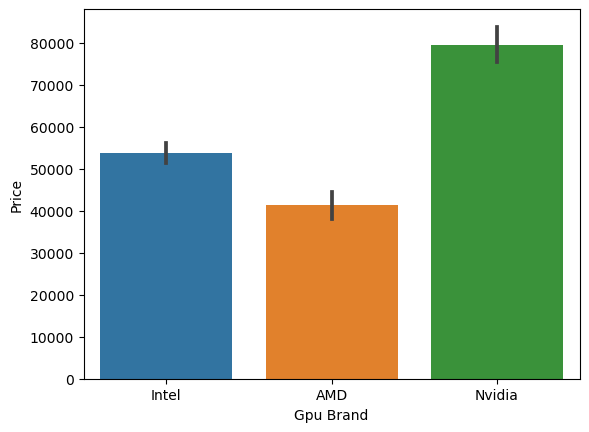

In [515]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])

In [516]:
df.drop(columns=['Gpu'],inplace = True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\3985948553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace = True)


In [517]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5,0,128,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel


In [518]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [521]:
def cat_os(inp):
    if inp =='Windows 10' or inp =='Windows 7' or inp =='Windows 10 s':
        return ' Windows'
    elif inp =='macOS' or inp =='mac OS X' :
        return 'Mac'
    else:
        return 'Others/No os /Linux'
       

In [523]:
df['OS']=df['OpSys'].apply(cat_os)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\1995948337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS']=df['OpSys'].apply(cat_os)


In [524]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,macOS,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5,0,128,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No os /Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,macOS,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,macOS,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac


In [525]:
df.drop(columns=['OpSys'],inplace = True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\3572285672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace = True)


In [526]:
df.head()

,Company,TypeName,Cpu,Ram,Weight,Price,IPS,ppi,Cpu Name,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,1.37,71378.6832,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,1.34,47895.5232,0,127.677940,Intel Core i5,Intel Core i5,0,128,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1.86,30636.0000,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No os /Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,1.83,135195.3360,1,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,1.37,96095.8080,1,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='OS', ylabel='Price'>

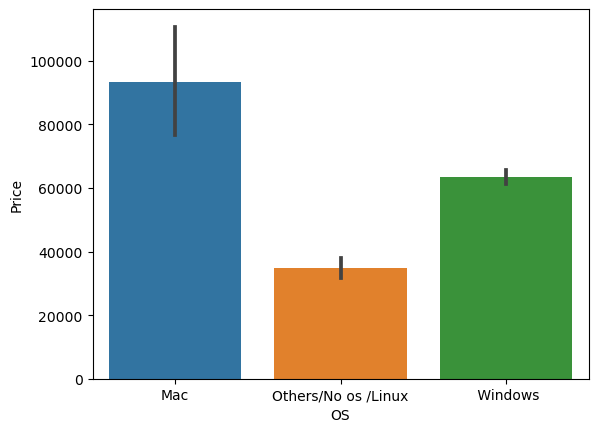

In [527]:
sns.barplot(x=df['OS'],y=df['Price'])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

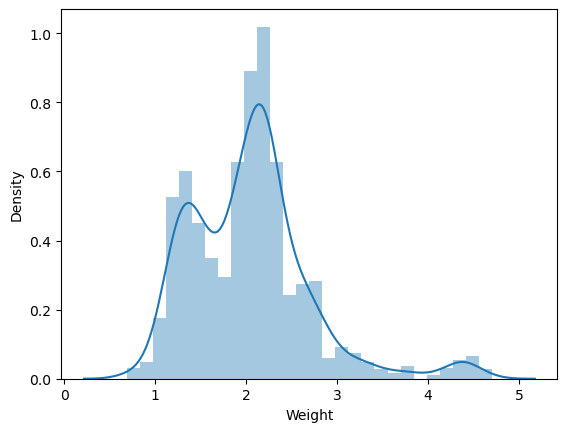

In [528]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

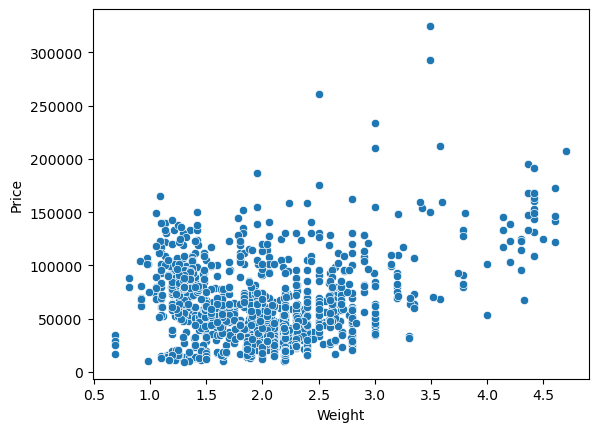

In [529]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [546]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\687122208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Cpu','Cpu Name'],inplace=True)


In [555]:
df.head()

,Company,TypeName,Ram,Weight,Price,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Others/No os /Linux
3,Apple,Ultrabook,16,1.83,135195.3360,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [558]:
numeric_columns = df.select_dtypes(include=['number'])

In [559]:
correlation_matrix = numeric_columns.corr()

In [560]:
print(correlation_matrix)

             Ram    Weight     Price       IPS       ppi       HDD       SSD
Ram     1.000000  0.383362  0.742905  0.207949  0.305688  0.095808  0.350849
Weight  0.383362  1.000000  0.209867  0.018643 -0.321883  0.514147  0.549183
Price   0.742905  0.209867  1.000000  0.253320  0.475368 -0.096891  0.160308
IPS     0.207949  0.018643  0.253320  1.000000  0.299142 -0.093588 -0.013182
ppi     0.305688 -0.321883  0.475368  0.299142  1.000000 -0.294698 -0.120510
HDD     0.095808  0.514147 -0.096891 -0.093588 -0.294698  1.000000  0.920629
SSD     0.350849  0.549183  0.160308 -0.013182 -0.120510  0.920629  1.000000


C:\Users\Harsh\AppData\Local\Temp\ipykernel_14632\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

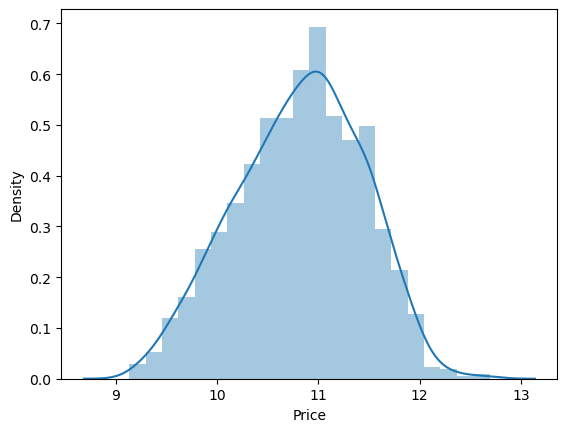

In [564]:
sns.distplot(np.log(df['Price']))

In [565]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [567]:
X

,Company,TypeName,Ram,Weight,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,127.677940,Intel Core i5,0,128,Intel,Mac
2,HP,Notebook,8,1.86,0,141.211998,Intel Core i5,0,256,Intel,Others/No os /Linux
3,Apple,Ultrabook,16,1.83,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,111.935204,Other Intel Processor,0,64,Intel,Windows
1301,HP,Notebook,6,2.19,0,100.454670,Intel Core i7,1000,1000,AMD,Windows


In [569]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [570]:
from sklearn.model_selection import train_test_split

In [572]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [573]:
X_train

,Company,TypeName,Ram,Weight,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,OS
183,Toshiba,Notebook,8,2.00,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,141.211998,Intel Core i7,1000,1128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,135.094211,Other Intel Processor,0,16,Intel,Others/No os /Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,141.211998,Intel Core i3,1000,1000,Intel,Windows
878,Dell,Notebook,4,2.18,0,141.211998,Intel Core i5,1000,1128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,100.454670,Intel Core i3,500,500,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,100.454670,AMD Processor,1000,1000,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,100.454670,Intel Core i3,2000,2000,Nvidia,Others/No os /Linux


# Machine learning part

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

### import machine learning algorithms

In [588]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

##  LinearRegression model

In [593]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8122968611650357
MAE 0.20845634205038432


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Ridge Regression model

In [596]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.816663915503652
MAE 0.20829696303525003


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Lasso  Regression model

In [597]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8103785685931707
MAE 0.21006782152430786


C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## KNN 

In [598]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8118166653287106
MAE 0.20045115171968453


In [599]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))